Environment Set up

In [1]:
import numpy as np
import pandas as pd
import tweepy
import json
import re
from tweepy import *
 
import csv
import re 
import string
import tweepy
import datetime

import os
import glob

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# Text Processing
from textblob import TextBlob
import nltk
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Split Data
from sklearn.model_selection import train_test_split

# Model
from sklearn.naive_bayes import *
from sklearn import metrics

# Model Evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

[nltk_data] Downloading package punkt to /Users/edah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/edah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/edah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cleaning London Data

In [2]:
a = pd.read_csv("London_Data.csv")
a

/Users/edah/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3106: DtypeWarning: Columns (0,2,3,5,8,13,15,16,17,18,19,20,31,32,40,43,45,46,47,48,49,50,51,52,53,54,58,65,66,67,68,69,70,71,178,179,180,181,182) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,quoted_status.geo.type,quoted_status.geo.coordinates,quoted_status.coordinates.type,quoted_status.coordinates.coordinates,quoted_status.scopes.followers
0,0,Sat Apr 09 09:34:42 +0000 2022,1512725683998449664,1512725683998449664,"*rubs eyes*\n\nWell, it's finally here.\n\nWe ...",False,"[0, 181]","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sat Apr 09 09:31:06 +0000 2022,1512724774866235396,1512724774866235396,"See our latest #London, England #Retail job op...",False,"[0, 155]","<a href=""https://www.careerarc.com"" rel=""nofol...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sat Apr 09 09:21:27 +0000 2022,1512722347027046406,1512722347027046406,Gardening in the sun #gardening https://t.co/B...,False,"[0, 31]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Sat Apr 09 09:20:31 +0000 2022,1512722111739142144,1512722111739142144,Weekend ready and hoping for sunshine like thi...,False,"[0, 65]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Sat Apr 09 09:17:26 +0000 2022,1512721338720477194,1512721338720477194,Sounds like you’re gonna get mugged. https://t...,False,"[0, 36]","<a href=""http://twitter.com/download/iphone"" r...",1.5127165871318835e+18,1.512717e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15173,2913,Fri Apr 01 09:35:45 +0000 2022,1509826844299870248,1509826844299870248,I've contacted them so many times without any ...,False,"[0, 50]","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15174,2914,Fri Apr 01 09:34:50 +0000 2022,1509826612354768898,1509826612354768898,Thought it was 2030? https://t.co/IAX0ZH1URS,False,"[0, 20]","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15175,2915,Fri Apr 01 09:29:04 +0000 2022,1509825163126358044,1509825163126358044,@addisonjmitch @merryMitchard And did you disc...,False,"[30, 291]","<a href=""http://twitter.com/download/iphone"" r...",1508888299192082432.0,1.508888e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15176,2916,Fri Apr 01 09:28:55 +0000 2022,1509825125880938514,1509825125880938514,@mbhw Sorry! What a mess. I’m told they get an...,False,"[6, 276]","<a href=""http://twitter.com/download/iphone"" r...",1509824250747797504.0,1.509824e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
is_uk =  a['place.country']=='United Kingdom'

a = a[is_uk]
a

,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,quoted_status.geo.type,quoted_status.geo.coordinates,quoted_status.coordinates.type,quoted_status.coordinates.coordinates,quoted_status.scopes.followers
0,0,Sat Apr 09 09:34:42 +0000 2022,1512725683998449664,1512725683998449664,"*rubs eyes*\n\nWell, it's finally here.\n\nWe ...",False,"[0, 181]","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sat Apr 09 09:31:06 +0000 2022,1512724774866235396,1512724774866235396,"See our latest #London, England #Retail job op...",False,"[0, 155]","<a href=""https://www.careerarc.com"" rel=""nofol...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sat Apr 09 09:21:27 +0000 2022,1512722347027046406,1512722347027046406,Gardening in the sun #gardening https://t.co/B...,False,"[0, 31]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Sat Apr 09 09:20:31 +0000 2022,1512722111739142144,1512722111739142144,Weekend ready and hoping for sunshine like thi...,False,"[0, 65]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Sat Apr 09 09:17:26 +0000 2022,1512721338720477194,1512721338720477194,Sounds like you’re gonna get mugged. https://t...,False,"[0, 36]","<a href=""http://twitter.com/download/iphone"" r...",1.5127165871318835e+18,1.512717e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15173,2913,Fri Apr 01 09:35:45 +0000 2022,1509826844299870248,1509826844299870248,I've contacted them so many times without any ...,False,"[0, 50]","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15174,2914,Fri Apr 01 09:34:50 +0000 2022,1509826612354768898,1509826612354768898,Thought it was 2030? https://t.co/IAX0ZH1URS,False,"[0, 20]","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15175,2915,Fri Apr 01 09:29:04 +0000 2022,1509825163126358044,1509825163126358044,@addisonjmitch @merryMitchard And did you disc...,False,"[30, 291]","<a href=""http://twitter.com/download/iphone"" r...",1508888299192082432.0,1.508888e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15176,2916,Fri Apr 01 09:28:55 +0000 2022,1509825125880938514,1509825125880938514,@mbhw Sorry! What a mess. I’m told they get an...,False,"[6, 276]","<a href=""http://twitter.com/download/iphone"" r...",1509824250747797504.0,1.509824e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
a['place.name'] = 'London'
a['place.name']

/var/folders/zy/ptqs7vjs2lg57476q57y82g80000gn/T/ipykernel_4181/1852983222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['place.name'] = 'London'


0        London
1        London
2        London
3        London
4        London
          ...  
15173    London
15174    London
15175    London
15176    London
15177    London
Name: place.name, Length: 15173, dtype: object

Cleaning Glasgow Data

In [5]:
b = pd.read_csv("Glasgow_Data.csv")
b

/Users/edah/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3106: DtypeWarning: Columns (178) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,entities.media,extended_entities.media,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,quoted_status.scopes.followers
0,0,Sat Apr 09 09:31:47 +0000 2022,1512724950221733893,1512724950221733893,@Michael31141084 @Record_Sport When did he men...,False,"[31, 61]","<a href=""http://twitter.com/download/iphone"" r...",1.512408e+18,1.512408e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sat Apr 09 09:31:43 +0000 2022,1512724929892040705,1512724929892040705,Criminal the Dundee or Edinburgh derby isn’t o...,False,"[0, 145]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sat Apr 09 09:31:33 +0000 2022,1512724889853124609,1512724889853124609,How proud would you be being the parents of th...,False,"[0, 64]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Sat Apr 09 09:30:11 +0000 2022,1512724547673464832,1512724547673464832,[emptying six jars of baby food into six tiny ...,False,"[0, 71]","<a href=""http://tapbots.com/tweetbot"" rel=""nof...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Sat Apr 09 09:29:51 +0000 2022,1512724462071910400,1512724462071910400,@myracingtips DELTA WORK,False,"[14, 24]","<a href=""http://twitter.com/download/android"" ...",1.512721e+18,1.512721e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13149,13149,Fri Apr 01 09:30:14 +0000 2022,1509825456111075358,1509825456111075358,@LordofSnowNRain I hope you're going to clean ...,False,"[17, 86]","<a href=""http://twitter.com/download/android"" ...",1.509825e+18,1.509825e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13150,13150,Fri Apr 01 09:29:47 +0000 2022,1509825341187137536,1509825341187137536,@sc_bho Fuck that,False,"[8, 17]","<a href=""http://twitter.com/download/android"" ...",1.509825e+18,1.509825e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13151,13151,Fri Apr 01 09:28:56 +0000 2022,1509825127286030379,1509825127286030379,#Glasgow Killer driver caged for life for Gary...,False,"[0, 99]","<a href=""http://oysttyer.github.io/oysttyer/"" ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13152,13152,Fri Apr 01 09:26:40 +0000 2022,1509824558794260484,1509824558794260484,Just posted a photo @ Katie's Bar Glasgow http...,False,"[0, 65]","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
is_uk1 =  b['place.country']=='United Kingdom'

b = b[is_uk1]
b

,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,entities.media,extended_entities.media,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,quoted_status.scopes.followers
0,0,Sat Apr 09 09:31:47 +0000 2022,1512724950221733893,1512724950221733893,@Michael31141084 @Record_Sport When did he men...,False,"[31, 61]","<a href=""http://twitter.com/download/iphone"" r...",1.512408e+18,1.512408e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sat Apr 09 09:31:43 +0000 2022,1512724929892040705,1512724929892040705,Criminal the Dundee or Edinburgh derby isn’t o...,False,"[0, 145]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sat Apr 09 09:31:33 +0000 2022,1512724889853124609,1512724889853124609,How proud would you be being the parents of th...,False,"[0, 64]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Sat Apr 09 09:30:11 +0000 2022,1512724547673464832,1512724547673464832,[emptying six jars of baby food into six tiny ...,False,"[0, 71]","<a href=""http://tapbots.com/tweetbot"" rel=""nof...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Sat Apr 09 09:29:51 +0000 2022,1512724462071910400,1512724462071910400,@myracingtips DELTA WORK,False,"[14, 24]","<a href=""http://twitter.com/download/android"" ...",1.512721e+18,1.512721e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13149,13149,Fri Apr 01 09:30:14 +0000 2022,1509825456111075358,1509825456111075358,@LordofSnowNRain I hope you're going to clean ...,False,"[17, 86]","<a href=""http://twitter.com/download/android"" ...",1.509825e+18,1.509825e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13150,13150,Fri Apr 01 09:29:47 +0000 2022,1509825341187137536,1509825341187137536,@sc_bho Fuck that,False,"[8, 17]","<a href=""http://twitter.com/download/android"" ...",1.509825e+18,1.509825e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13151,13151,Fri Apr 01 09:28:56 +0000 2022,1509825127286030379,1509825127286030379,#Glasgow Killer driver caged for life for Gary...,False,"[0, 99]","<a href=""http://oysttyer.github.io/oysttyer/"" ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13152,13152,Fri Apr 01 09:26:40 +0000 2022,1509824558794260484,1509824558794260484,Just posted a photo @ Katie's Bar Glasgow http...,False,"[0, 65]","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
b['place.name'] = 'Glasgow'
b['place.name']

0        Glasgow
1        Glasgow
2        Glasgow
3        Glasgow
4        Glasgow
          ...   
13149    Glasgow
13150    Glasgow
13151    Glasgow
13152    Glasgow
13153    Glasgow
Name: place.name, Length: 13154, dtype: object

Cleaning Cardiff Data

In [8]:
c = pd.read_csv("Cardiff_Data.csv")
c

,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status.place.place_type,quoted_status.place.name,quoted_status.place.full_name,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str
0,0,Sat Apr 09 09:31:05 +0000 2022,1512724773348024322,1512724773348024322,@llandaffcity Oh we love an Easter Parade! htt...,False,"[14, 42]","<a href=""http://twitter.com/download/android"" ...",1.512442e+18,1.512442e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sat Apr 09 09:28:34 +0000 2022,1512724140364550145,1512724140364550145,@Securityman09 @andie1105 @RishiSunak @zarahsu...,False,"[52, 147]","<a href=""http://twitter.com/download/android"" ...",1.512719e+18,1.512719e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sat Apr 09 09:27:56 +0000 2022,1512723981241098243,1512723981241098243,Llandaff Cathedral from the roof of the nave h...,False,"[0, 44]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Sat Apr 09 09:27:38 +0000 2022,1512723904107892743,1512723904107892743,Recently I added checking my boobs to my routi...,False,"[0, 265]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Sat Apr 09 09:27:16 +0000 2022,1512723810310631428,1512723810310631428,@EssexTory @JosephWalsh9 @andie1105 @RishiSuna...,False,"[62, 80]","<a href=""http://twitter.com/download/android"" ...",1.512721e+18,1.512721e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5571,157,Fri Apr 01 12:28:25 +0000 2022,1509870295187968011,1509870295187968011,@jeff87333 @JackPosobiec Thanks man!! 🤣🤣🤣,False,"[25, 41]","<a href=""http://twitter.com/download/android"" ...",1.509870e+18,1.509870e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5572,158,Fri Apr 01 12:21:39 +0000 2022,1509868594078928906,1509868594078928906,@jeff87333 What brand? I'm thinking of giving ...,False,"[11, 214]","<a href=""http://twitter.com/download/android"" ...",1.509868e+18,1.509868e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5573,159,Fri Apr 01 12:12:31 +0000 2022,1509866293943484421,1509866293943484421,@jeff87333 I gave up booze as well. I've read ...,False,"[11, 295]","<a href=""http://twitter.com/download/android"" ...",1.509865e+18,1.509865e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5574,160,Fri Apr 01 11:57:53 +0000 2022,1509862613332762624,1509862613332762624,@jeff87333 Of course! I forgot Big Pharma.,False,"[11, 42]","<a href=""http://twitter.com/download/android"" ...",1.509862e+18,1.509862e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
is_uk2 =  c['place.country']=='United Kingdom'

c = c[is_uk2]
c

,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status.place.place_type,quoted_status.place.name,quoted_status.place.full_name,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str
0,0,Sat Apr 09 09:31:05 +0000 2022,1512724773348024322,1512724773348024322,@llandaffcity Oh we love an Easter Parade! htt...,False,"[14, 42]","<a href=""http://twitter.com/download/android"" ...",1.512442e+18,1.512442e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sat Apr 09 09:28:34 +0000 2022,1512724140364550145,1512724140364550145,@Securityman09 @andie1105 @RishiSunak @zarahsu...,False,"[52, 147]","<a href=""http://twitter.com/download/android"" ...",1.512719e+18,1.512719e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sat Apr 09 09:27:56 +0000 2022,1512723981241098243,1512723981241098243,Llandaff Cathedral from the roof of the nave h...,False,"[0, 44]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Sat Apr 09 09:27:38 +0000 2022,1512723904107892743,1512723904107892743,Recently I added checking my boobs to my routi...,False,"[0, 265]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Sat Apr 09 09:27:16 +0000 2022,1512723810310631428,1512723810310631428,@EssexTory @JosephWalsh9 @andie1105 @RishiSuna...,False,"[62, 80]","<a href=""http://twitter.com/download/android"" ...",1.512721e+18,1.512721e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5409,5409,Fri Apr 01 09:30:02 +0000 2022,1509825404454027271,1509825404454027271,Our cadets had a great time taking on the Ninj...,False,"[0, 92]","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5410,5410,Fri Apr 01 09:28:24 +0000 2022,1509824993013776415,1509824993013776415,i would advocate for this https://t.co/apwtqX5GS9,False,"[0, 25]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5411,5411,Fri Apr 01 09:27:08 +0000 2022,1509824677430149126,1509824677430149126,@lee_slee @SianN_1979 was my old director of f...,False,"[10, 126]","<a href=""http://twitter.com/download/android"" ...",1.509824e+18,1.509824e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5412,5412,Fri Apr 01 09:26:15 +0000 2022,1509824455056539649,1509824455056539649,@lee_slee Love it! 😁,False,"[10, 20]","<a href=""http://twitter.com/download/android"" ...",1.509824e+18,1.509824e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
c['place.name'] = 'Cardiff'
c['place.name']

/var/folders/zy/ptqs7vjs2lg57476q57y82g80000gn/T/ipykernel_4181/1550138578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['place.name'] = 'Cardiff'


0       Cardiff
1       Cardiff
2       Cardiff
3       Cardiff
4       Cardiff
         ...   
5409    Cardiff
5410    Cardiff
5411    Cardiff
5412    Cardiff
5413    Cardiff
Name: place.name, Length: 5414, dtype: object

Joining the DataFrames

In [11]:
# b = b.dropna(axis=1)
csv = [a,b,c]
dataframe2 = pd.concat(csv)
display(dataframe2)
dataframe2.to_csv('df2.csv')

,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,quoted_status.geo.type,quoted_status.geo.coordinates,quoted_status.coordinates.type,quoted_status.coordinates.coordinates,quoted_status.scopes.followers
0,0,Sat Apr 09 09:34:42 +0000 2022,1512725683998449664,1512725683998449664,"*rubs eyes*\n\nWell, it's finally here.\n\nWe ...",False,"[0, 181]","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sat Apr 09 09:31:06 +0000 2022,1512724774866235396,1512724774866235396,"See our latest #London, England #Retail job op...",False,"[0, 155]","<a href=""https://www.careerarc.com"" rel=""nofol...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sat Apr 09 09:21:27 +0000 2022,1512722347027046406,1512722347027046406,Gardening in the sun #gardening https://t.co/B...,False,"[0, 31]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Sat Apr 09 09:20:31 +0000 2022,1512722111739142144,1512722111739142144,Weekend ready and hoping for sunshine like thi...,False,"[0, 65]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Sat Apr 09 09:17:26 +0000 2022,1512721338720477194,1512721338720477194,Sounds like you’re gonna get mugged. https://t...,False,"[0, 36]","<a href=""http://twitter.com/download/iphone"" r...",1.5127165871318835e+18,1.512717e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5409,5409,Fri Apr 01 09:30:02 +0000 2022,1509825404454027271,1509825404454027271,Our cadets had a great time taking on the Ninj...,False,"[0, 92]","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5410,5410,Fri Apr 01 09:28:24 +0000 2022,1509824993013776415,1509824993013776415,i would advocate for this https://t.co/apwtqX5GS9,False,"[0, 25]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5411,5411,Fri Apr 01 09:27:08 +0000 2022,1509824677430149126,1509824677430149126,@lee_slee @SianN_1979 was my old director of f...,False,"[10, 126]","<a href=""http://twitter.com/download/android"" ...",1509823753722773504.0,1.509824e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5412,5412,Fri Apr 01 09:26:15 +0000 2022,1509824455056539649,1509824455056539649,@lee_slee Love it! 😁,False,"[10, 20]","<a href=""http://twitter.com/download/android"" ...",1509823753722773504.0,1.509824e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cleaning DataFrame

In [12]:
to_keep = ['created_at',
           'id',
           'full_text',
           'user.name',
           'user.screen_name',
           'user.location',
           'user.description',
           'user.created_at',
           'favorite_count',
           'retweet_count',
           'user.favourites_count',
           'user.verified',
           'user.statuses_count',
           'place.name',
           'place.full_name',
           'place.country_code',
           'place.country',
           'place.bounding_box.coordinates'
           ] 

dfclean = dataframe2[to_keep]
dfclean.head()

,created_at,id,full_text,user.name,user.screen_name,user.location,user.description,user.created_at,favorite_count,retweet_count,user.favourites_count,user.verified,user.statuses_count,place.name,place.full_name,place.country_code,place.country,place.bounding_box.coordinates
0,Sat Apr 09 09:34:42 +0000 2022,1512725683998449664,"*rubs eyes*\n\nWell, it's finally here.\n\nWe ...",Hamza Jahanzeb,hamzajahanzeb,Lancashire/Westminster,💥 Sensitivity Reader\n🎭 Publishing & Theatre B...,Sun Aug 12 11:17:38 +0000 2012,0,0,164345,False,40646,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
1,Sat Apr 09 09:31:06 +0000 2022,1512724774866235396,"See our latest #London, England #Retail job op...",TMJ- LON Retail Jobs,tmj_lon_retail,London,Follow this account for geo-targeted Retail jo...,Fri Apr 03 13:19:31 +0000 2009,0,0,0,False,923,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
2,Sat Apr 09 09:21:27 +0000 2022,1512722347027046406,Gardening in the sun #gardening https://t.co/B...,Rob 🇬🇧 🪴 🇺🇦,robjdphotos,"London, England","Mainly photos from travels, architecture, plan...",Wed Apr 01 18:33:12 +0000 2015,0,0,2864,False,8434,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
3,Sat Apr 09 09:20:31 +0000 2022,1512722111739142144,Weekend ready and hoping for sunshine like thi...,Bateaux London,BateauxLondon,"London, England",⚓️ Majestic dinner and lunch cruises 🍽 Live mu...,Wed Mar 18 08:33:06 +0000 2009,1,0,3682,False,2972,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
4,Sat Apr 09 09:17:26 +0000 2022,1512721338720477194,Sounds like you’re gonna get mugged. https://t...,Adam Panzer,apanzerj,"San Francisco, CA",Infra Duder @ Second Act | (he/him) | Former: ...,Wed Sep 01 21:01:06 +0000 2010,0,0,2638,False,3370,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."


In [13]:
dfclean.dropna()
dfclean

,created_at,id,full_text,user.name,user.screen_name,user.location,user.description,user.created_at,favorite_count,retweet_count,user.favourites_count,user.verified,user.statuses_count,place.name,place.full_name,place.country_code,place.country,place.bounding_box.coordinates
0,Sat Apr 09 09:34:42 +0000 2022,1512725683998449664,"*rubs eyes*\n\nWell, it's finally here.\n\nWe ...",Hamza Jahanzeb,hamzajahanzeb,Lancashire/Westminster,💥 Sensitivity Reader\n🎭 Publishing & Theatre B...,Sun Aug 12 11:17:38 +0000 2012,0,0,164345,False,40646,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
1,Sat Apr 09 09:31:06 +0000 2022,1512724774866235396,"See our latest #London, England #Retail job op...",TMJ- LON Retail Jobs,tmj_lon_retail,London,Follow this account for geo-targeted Retail jo...,Fri Apr 03 13:19:31 +0000 2009,0,0,0,False,923,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
2,Sat Apr 09 09:21:27 +0000 2022,1512722347027046406,Gardening in the sun #gardening https://t.co/B...,Rob 🇬🇧 🪴 🇺🇦,robjdphotos,"London, England","Mainly photos from travels, architecture, plan...",Wed Apr 01 18:33:12 +0000 2015,0,0,2864,False,8434,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
3,Sat Apr 09 09:20:31 +0000 2022,1512722111739142144,Weekend ready and hoping for sunshine like thi...,Bateaux London,BateauxLondon,"London, England",⚓️ Majestic dinner and lunch cruises 🍽 Live mu...,Wed Mar 18 08:33:06 +0000 2009,1,0,3682,False,2972,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
4,Sat Apr 09 09:17:26 +0000 2022,1512721338720477194,Sounds like you’re gonna get mugged. https://t...,Adam Panzer,apanzerj,"San Francisco, CA",Infra Duder @ Second Act | (he/him) | Former: ...,Wed Sep 01 21:01:06 +0000 2010,0,0,2638,False,3370,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5409,Fri Apr 01 09:30:02 +0000 2022,1509825404454027271,Our cadets had a great time taking on the Ninj...,1223Squadron,1223Squadron,"Morgan Jones Park, Caerphilly",Air Cadets Squadron based in Caerphilly,Tue Oct 15 09:04:42 +0000 2013,7,0,199,False,311,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473..."
5410,Fri Apr 01 09:28:24 +0000 2022,1509824993013776415,i would advocate for this https://t.co/apwtqX5GS9,Josh,grungecowboi,"Cardiff, Wales",21. He/Him. ur mum's fave emo,Mon Nov 20 12:34:51 +0000 2017,2,0,79499,False,14002,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473..."
5411,Fri Apr 01 09:27:08 +0000 2022,1509824677430149126,@lee_slee @SianN_1979 was my old director of f...,Jonathan Conway 🇺🇦,JonathanConway9,Cardiff,Sci-fi/Fantasy geek. Work in Social Housing in...,Sun Nov 04 18:00:50 +0000 2012,2,0,26839,False,17866,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473..."
5412,Fri Apr 01 09:26:15 +0000 2022,1509824455056539649,@lee_slee Love it! 😁,Jonathan Conway 🇺🇦,JonathanConway9,Cardiff,Sci-fi/Fantasy geek. Work in Social Housing in...,Sun Nov 04 18:00:50 +0000 2012,1,0,26839,False,17866,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473..."


Remove Special Characters

In [14]:
def cleanTxt(text):

  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?:/\/\S+', '', text)

  return text

dfclean['full_text'] = dfclean['full_text'].apply(str)
dfclean['full_text'] = dfclean['full_text'].apply(cleanTxt)
dfclean

/var/folders/zy/ptqs7vjs2lg57476q57y82g80000gn/T/ipykernel_4181/2322864311.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclean['full_text'] = dfclean['full_text'].apply(str)
/var/folders/zy/ptqs7vjs2lg57476q57y82g80000gn/T/ipykernel_4181/2322864311.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclean['full_text'] = dfclean['full_text'].apply(cleanTxt)


,created_at,id,full_text,user.name,user.screen_name,user.location,user.description,user.created_at,favorite_count,retweet_count,user.favourites_count,user.verified,user.statuses_count,place.name,place.full_name,place.country_code,place.country,place.bounding_box.coordinates
0,Sat Apr 09 09:34:42 +0000 2022,1512725683998449664,"*rubs eyes*\n\nWell, it's finally here.\n\nWe ...",Hamza Jahanzeb,hamzajahanzeb,Lancashire/Westminster,💥 Sensitivity Reader\n🎭 Publishing & Theatre B...,Sun Aug 12 11:17:38 +0000 2012,0,0,164345,False,40646,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
1,Sat Apr 09 09:31:06 +0000 2022,1512724774866235396,"See our latest London, England Retail job oppo...",TMJ- LON Retail Jobs,tmj_lon_retail,London,Follow this account for geo-targeted Retail jo...,Fri Apr 03 13:19:31 +0000 2009,0,0,0,False,923,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
2,Sat Apr 09 09:21:27 +0000 2022,1512722347027046406,Gardening in the sun gardening,Rob 🇬🇧 🪴 🇺🇦,robjdphotos,"London, England","Mainly photos from travels, architecture, plan...",Wed Apr 01 18:33:12 +0000 2015,0,0,2864,False,8434,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
3,Sat Apr 09 09:20:31 +0000 2022,1512722111739142144,Weekend ready and hoping for sunshine like thi...,Bateaux London,BateauxLondon,"London, England",⚓️ Majestic dinner and lunch cruises 🍽 Live mu...,Wed Mar 18 08:33:06 +0000 2009,1,0,3682,False,2972,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
4,Sat Apr 09 09:17:26 +0000 2022,1512721338720477194,Sounds like you’re gonna get mugged.,Adam Panzer,apanzerj,"San Francisco, CA",Infra Duder @ Second Act | (he/him) | Former: ...,Wed Sep 01 21:01:06 +0000 2010,0,0,2638,False,3370,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5409,Fri Apr 01 09:30:02 +0000 2022,1509825404454027271,Our cadets had a great time taking on the Ninj...,1223Squadron,1223Squadron,"Morgan Jones Park, Caerphilly",Air Cadets Squadron based in Caerphilly,Tue Oct 15 09:04:42 +0000 2013,7,0,199,False,311,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473..."
5410,Fri Apr 01 09:28:24 +0000 2022,1509824993013776415,i would advocate for this,Josh,grungecowboi,"Cardiff, Wales",21. He/Him. ur mum's fave emo,Mon Nov 20 12:34:51 +0000 2017,2,0,79499,False,14002,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473..."
5411,Fri Apr 01 09:27:08 +0000 2022,1509824677430149126,_slee _1979 was my old director of fun if you ...,Jonathan Conway 🇺🇦,JonathanConway9,Cardiff,Sci-fi/Fantasy geek. Work in Social Housing in...,Sun Nov 04 18:00:50 +0000 2012,2,0,26839,False,17866,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473..."
5412,Fri Apr 01 09:26:15 +0000 2022,1509824455056539649,_slee Love it! 😁,Jonathan Conway 🇺🇦,JonathanConway9,Cardiff,Sci-fi/Fantasy geek. Work in Social Housing in...,Sun Nov 04 18:00:50 +0000 2012,1,0,26839,False,17866,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473..."


Remove Emojis

In [15]:
def no_emojis(data):
    emoji = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoji, '', data)

dfclean['full_text'] = dfclean['full_text'].apply(str)
dfclean['full_text'] = dfclean['full_text'].apply(no_emojis)
dfclean

/var/folders/zy/ptqs7vjs2lg57476q57y82g80000gn/T/ipykernel_4181/199516194.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclean['full_text'] = dfclean['full_text'].apply(str)
/var/folders/zy/ptqs7vjs2lg57476q57y82g80000gn/T/ipykernel_4181/199516194.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclean['full_text'] = dfclean['full_text'].apply(no_emojis)


,created_at,id,full_text,user.name,user.screen_name,user.location,user.description,user.created_at,favorite_count,retweet_count,user.favourites_count,user.verified,user.statuses_count,place.name,place.full_name,place.country_code,place.country,place.bounding_box.coordinates
0,Sat Apr 09 09:34:42 +0000 2022,1512725683998449664,"*rubs eyes*\n\nWell, it's finally here.\n\nWe ...",Hamza Jahanzeb,hamzajahanzeb,Lancashire/Westminster,💥 Sensitivity Reader\n🎭 Publishing & Theatre B...,Sun Aug 12 11:17:38 +0000 2012,0,0,164345,False,40646,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
1,Sat Apr 09 09:31:06 +0000 2022,1512724774866235396,"See our latest London, England Retail job oppo...",TMJ- LON Retail Jobs,tmj_lon_retail,London,Follow this account for geo-targeted Retail jo...,Fri Apr 03 13:19:31 +0000 2009,0,0,0,False,923,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
2,Sat Apr 09 09:21:27 +0000 2022,1512722347027046406,Gardening in the sun gardening,Rob 🇬🇧 🪴 🇺🇦,robjdphotos,"London, England","Mainly photos from travels, architecture, plan...",Wed Apr 01 18:33:12 +0000 2015,0,0,2864,False,8434,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
3,Sat Apr 09 09:20:31 +0000 2022,1512722111739142144,Weekend ready and hoping for sunshine like thi...,Bateaux London,BateauxLondon,"London, England",⚓️ Majestic dinner and lunch cruises 🍽 Live mu...,Wed Mar 18 08:33:06 +0000 2009,1,0,3682,False,2972,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
4,Sat Apr 09 09:17:26 +0000 2022,1512721338720477194,Sounds like you’re gonna get mugged.,Adam Panzer,apanzerj,"San Francisco, CA",Infra Duder @ Second Act | (he/him) | Former: ...,Wed Sep 01 21:01:06 +0000 2010,0,0,2638,False,3370,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5409,Fri Apr 01 09:30:02 +0000 2022,1509825404454027271,Our cadets had a great time taking on the Ninj...,1223Squadron,1223Squadron,"Morgan Jones Park, Caerphilly",Air Cadets Squadron based in Caerphilly,Tue Oct 15 09:04:42 +0000 2013,7,0,199,False,311,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473..."
5410,Fri Apr 01 09:28:24 +0000 2022,1509824993013776415,i would advocate for this,Josh,grungecowboi,"Cardiff, Wales",21. He/Him. ur mum's fave emo,Mon Nov 20 12:34:51 +0000 2017,2,0,79499,False,14002,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473..."
5411,Fri Apr 01 09:27:08 +0000 2022,1509824677430149126,_slee _1979 was my old director of fun if you ...,Jonathan Conway 🇺🇦,JonathanConway9,Cardiff,Sci-fi/Fantasy geek. Work in Social Housing in...,Sun Nov 04 18:00:50 +0000 2012,2,0,26839,False,17866,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473..."
5412,Fri Apr 01 09:26:15 +0000 2022,1509824455056539649,_slee Love it!,Jonathan Conway 🇺🇦,JonathanConway9,Cardiff,Sci-fi/Fantasy geek. Work in Social Housing in...,Sun Nov 04 18:00:50 +0000 2012,1,0,26839,False,17866,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473..."


In [16]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33741 entries, 0 to 5413
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   created_at                      33741 non-null  object
 1   id                              33741 non-null  object
 2   full_text                       33741 non-null  object
 3   user.name                       33741 non-null  object
 4   user.screen_name                33741 non-null  object
 5   user.location                   30807 non-null  object
 6   user.description                31883 non-null  object
 7   user.created_at                 33741 non-null  object
 8   favorite_count                  33741 non-null  object
 9   retweet_count                   33741 non-null  object
 10  user.favourites_count           33741 non-null  object
 11  user.verified                   33741 non-null  object
 12  user.statuses_count             33741 non-null 

In [17]:
dfclean.dropna()
dfclean

,created_at,id,full_text,user.name,user.screen_name,user.location,user.description,user.created_at,favorite_count,retweet_count,user.favourites_count,user.verified,user.statuses_count,place.name,place.full_name,place.country_code,place.country,place.bounding_box.coordinates
0,Sat Apr 09 09:34:42 +0000 2022,1512725683998449664,"*rubs eyes*\n\nWell, it's finally here.\n\nWe ...",Hamza Jahanzeb,hamzajahanzeb,Lancashire/Westminster,💥 Sensitivity Reader\n🎭 Publishing & Theatre B...,Sun Aug 12 11:17:38 +0000 2012,0,0,164345,False,40646,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
1,Sat Apr 09 09:31:06 +0000 2022,1512724774866235396,"See our latest London, England Retail job oppo...",TMJ- LON Retail Jobs,tmj_lon_retail,London,Follow this account for geo-targeted Retail jo...,Fri Apr 03 13:19:31 +0000 2009,0,0,0,False,923,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
2,Sat Apr 09 09:21:27 +0000 2022,1512722347027046406,Gardening in the sun gardening,Rob 🇬🇧 🪴 🇺🇦,robjdphotos,"London, England","Mainly photos from travels, architecture, plan...",Wed Apr 01 18:33:12 +0000 2015,0,0,2864,False,8434,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
3,Sat Apr 09 09:20:31 +0000 2022,1512722111739142144,Weekend ready and hoping for sunshine like thi...,Bateaux London,BateauxLondon,"London, England",⚓️ Majestic dinner and lunch cruises 🍽 Live mu...,Wed Mar 18 08:33:06 +0000 2009,1,0,3682,False,2972,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
4,Sat Apr 09 09:17:26 +0000 2022,1512721338720477194,Sounds like you’re gonna get mugged.,Adam Panzer,apanzerj,"San Francisco, CA",Infra Duder @ Second Act | (he/him) | Former: ...,Wed Sep 01 21:01:06 +0000 2010,0,0,2638,False,3370,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5409,Fri Apr 01 09:30:02 +0000 2022,1509825404454027271,Our cadets had a great time taking on the Ninj...,1223Squadron,1223Squadron,"Morgan Jones Park, Caerphilly",Air Cadets Squadron based in Caerphilly,Tue Oct 15 09:04:42 +0000 2013,7,0,199,False,311,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473..."
5410,Fri Apr 01 09:28:24 +0000 2022,1509824993013776415,i would advocate for this,Josh,grungecowboi,"Cardiff, Wales",21. He/Him. ur mum's fave emo,Mon Nov 20 12:34:51 +0000 2017,2,0,79499,False,14002,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473..."
5411,Fri Apr 01 09:27:08 +0000 2022,1509824677430149126,_slee _1979 was my old director of fun if you ...,Jonathan Conway 🇺🇦,JonathanConway9,Cardiff,Sci-fi/Fantasy geek. Work in Social Housing in...,Sun Nov 04 18:00:50 +0000 2012,2,0,26839,False,17866,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473..."
5412,Fri Apr 01 09:26:15 +0000 2022,1509824455056539649,_slee Love it!,Jonathan Conway 🇺🇦,JonathanConway9,Cardiff,Sci-fi/Fantasy geek. Work in Social Housing in...,Sun Nov 04 18:00:50 +0000 2012,1,0,26839,False,17866,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473..."


In [18]:
dfclean.isna().sum()

created_at                           0
id                                   0
full_text                            0
user.name                            0
user.screen_name                     0
user.location                     2934
user.description                  1858
user.created_at                      0
favorite_count                       0
retweet_count                        0
user.favourites_count                0
user.verified                        0
user.statuses_count                  0
place.name                           0
place.full_name                      0
place.country_code                   0
place.country                        0
place.bounding_box.coordinates       0
dtype: int64

In [19]:
# marks_list = dfclean['place.name'].tolist()
  
# # show the list
# print(marks_list)

In [20]:
# https://medium.com/strands-tech-corner/unbalanced-datasets-what-to-do-144e0552d9cd

In [21]:
# Subjectivity
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def polarity(text):
   return TextBlob(text).sentiment.polarity

dfclean['Subjectivity'] = dfclean['full_text'].apply(subjectivity)
dfclean['Polarity'] = dfclean['full_text'].apply(polarity)

dfclean

/var/folders/zy/ptqs7vjs2lg57476q57y82g80000gn/T/ipykernel_4181/2160357189.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclean['Subjectivity'] = dfclean['full_text'].apply(subjectivity)
/var/folders/zy/ptqs7vjs2lg57476q57y82g80000gn/T/ipykernel_4181/2160357189.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclean['Polarity'] = dfclean['full_text'].apply(polarity)


,created_at,id,full_text,user.name,user.screen_name,user.location,user.description,user.created_at,favorite_count,retweet_count,user.favourites_count,user.verified,user.statuses_count,place.name,place.full_name,place.country_code,place.country,place.bounding_box.coordinates,Subjectivity,Polarity
0,Sat Apr 09 09:34:42 +0000 2022,1512725683998449664,"*rubs eyes*\n\nWell, it's finally here.\n\nWe ...",Hamza Jahanzeb,hamzajahanzeb,Lancashire/Westminster,💥 Sensitivity Reader\n🎭 Publishing & Theatre B...,Sun Aug 12 11:17:38 +0000 2012,0,0,164345,False,40646,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371...",0.633333,-0.066667
1,Sat Apr 09 09:31:06 +0000 2022,1512724774866235396,"See our latest London, England Retail job oppo...",TMJ- LON Retail Jobs,tmj_lon_retail,London,Follow this account for geo-targeted Retail jo...,Fri Apr 03 13:19:31 +0000 2009,0,0,0,False,923,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371...",0.900000,0.500000
2,Sat Apr 09 09:21:27 +0000 2022,1512722347027046406,Gardening in the sun gardening,Rob 🇬🇧 🪴 🇺🇦,robjdphotos,"London, England","Mainly photos from travels, architecture, plan...",Wed Apr 01 18:33:12 +0000 2015,0,0,2864,False,8434,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371...",0.000000,0.000000
3,Sat Apr 09 09:20:31 +0000 2022,1512722111739142144,Weekend ready and hoping for sunshine like thi...,Bateaux London,BateauxLondon,"London, England",⚓️ Majestic dinner and lunch cruises 🍽 Live mu...,Wed Mar 18 08:33:06 +0000 2009,1,0,3682,False,2972,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371...",0.500000,0.200000
4,Sat Apr 09 09:17:26 +0000 2022,1512721338720477194,Sounds like you’re gonna get mugged.,Adam Panzer,apanzerj,"San Francisco, CA",Infra Duder @ Second Act | (he/him) | Former: ...,Wed Sep 01 21:01:06 +0000 2010,0,0,2638,False,3370,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371...",0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5409,Fri Apr 01 09:30:02 +0000 2022,1509825404454027271,Our cadets had a great time taking on the Ninj...,1223Squadron,1223Squadron,"Morgan Jones Park, Caerphilly",Air Cadets Squadron based in Caerphilly,Tue Oct 15 09:04:42 +0000 2013,7,0,199,False,311,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473...",0.750000,0.800000
5410,Fri Apr 01 09:28:24 +0000 2022,1509824993013776415,i would advocate for this,Josh,grungecowboi,"Cardiff, Wales",21. He/Him. ur mum's fave emo,Mon Nov 20 12:34:51 +0000 2017,2,0,79499,False,14002,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473...",0.000000,0.000000
5411,Fri Apr 01 09:27:08 +0000 2022,1509824677430149126,_slee _1979 was my old director of fun if you ...,Jonathan Conway 🇺🇦,JonathanConway9,Cardiff,Sci-fi/Fantasy geek. Work in Social Housing in...,Sun Nov 04 18:00:50 +0000 2012,2,0,26839,False,17866,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473...",0.356000,0.402000
5412,Fri Apr 01 09:26:15 +0000 2022,1509824455056539649,_slee Love it!,Jonathan Conway 🇺🇦,JonathanConway9,Cardiff,Sci-fi/Fantasy geek. Work in Social Housing in...,Sun Nov 04 18:00:50 +0000 2012,1,0,26839,False,17866,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473...",0.600000,0.625000


In [22]:
dfclean.isna().sum()

created_at                           0
id                                   0
full_text                            0
user.name                            0
user.screen_name                     0
user.location                     2934
user.description                  1858
user.created_at                      0
favorite_count                       0
retweet_count                        0
user.favourites_count                0
user.verified                        0
user.statuses_count                  0
place.name                           0
place.full_name                      0
place.country_code                   0
place.country                        0
place.bounding_box.coordinates       0
Subjectivity                         0
Polarity                             0
dtype: int64

In [23]:
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

dfclean['Sentiment'] = dfclean['Polarity'].apply(getSentiment)

dfclean


/var/folders/zy/ptqs7vjs2lg57476q57y82g80000gn/T/ipykernel_4181/802172510.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclean['Sentiment'] = dfclean['Polarity'].apply(getSentiment)


,created_at,id,full_text,user.name,user.screen_name,user.location,user.description,user.created_at,favorite_count,retweet_count,...,user.verified,user.statuses_count,place.name,place.full_name,place.country_code,place.country,place.bounding_box.coordinates,Subjectivity,Polarity,Sentiment
0,Sat Apr 09 09:34:42 +0000 2022,1512725683998449664,"*rubs eyes*\n\nWell, it's finally here.\n\nWe ...",Hamza Jahanzeb,hamzajahanzeb,Lancashire/Westminster,💥 Sensitivity Reader\n🎭 Publishing & Theatre B...,Sun Aug 12 11:17:38 +0000 2012,0,0,...,False,40646,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371...",0.633333,-0.066667,Negative
1,Sat Apr 09 09:31:06 +0000 2022,1512724774866235396,"See our latest London, England Retail job oppo...",TMJ- LON Retail Jobs,tmj_lon_retail,London,Follow this account for geo-targeted Retail jo...,Fri Apr 03 13:19:31 +0000 2009,0,0,...,False,923,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371...",0.900000,0.500000,Positive
2,Sat Apr 09 09:21:27 +0000 2022,1512722347027046406,Gardening in the sun gardening,Rob 🇬🇧 🪴 🇺🇦,robjdphotos,"London, England","Mainly photos from travels, architecture, plan...",Wed Apr 01 18:33:12 +0000 2015,0,0,...,False,8434,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371...",0.000000,0.000000,Neutral
3,Sat Apr 09 09:20:31 +0000 2022,1512722111739142144,Weekend ready and hoping for sunshine like thi...,Bateaux London,BateauxLondon,"London, England",⚓️ Majestic dinner and lunch cruises 🍽 Live mu...,Wed Mar 18 08:33:06 +0000 2009,1,0,...,False,2972,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371...",0.500000,0.200000,Positive
4,Sat Apr 09 09:17:26 +0000 2022,1512721338720477194,Sounds like you’re gonna get mugged.,Adam Panzer,apanzerj,"San Francisco, CA",Infra Duder @ Second Act | (he/him) | Former: ...,Wed Sep 01 21:01:06 +0000 2010,0,0,...,False,3370,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371...",0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5409,Fri Apr 01 09:30:02 +0000 2022,1509825404454027271,Our cadets had a great time taking on the Ninj...,1223Squadron,1223Squadron,"Morgan Jones Park, Caerphilly",Air Cadets Squadron based in Caerphilly,Tue Oct 15 09:04:42 +0000 2013,7,0,...,False,311,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473...",0.750000,0.800000,Positive
5410,Fri Apr 01 09:28:24 +0000 2022,1509824993013776415,i would advocate for this,Josh,grungecowboi,"Cardiff, Wales",21. He/Him. ur mum's fave emo,Mon Nov 20 12:34:51 +0000 2017,2,0,...,False,14002,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473...",0.000000,0.000000,Neutral
5411,Fri Apr 01 09:27:08 +0000 2022,1509824677430149126,_slee _1979 was my old director of fun if you ...,Jonathan Conway 🇺🇦,JonathanConway9,Cardiff,Sci-fi/Fantasy geek. Work in Social Housing in...,Sun Nov 04 18:00:50 +0000 2012,2,0,...,False,17866,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473...",0.356000,0.402000,Positive
5412,Fri Apr 01 09:26:15 +0000 2022,1509824455056539649,_slee Love it!,Jonathan Conway 🇺🇦,JonathanConway9,Cardiff,Sci-fi/Fantasy geek. Work in Social Housing in...,Sun Nov 04 18:00:50 +0000 2012,1,0,...,False,17866,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473...",0.600000,0.625000,Positive


In [24]:
dfclean.isna().sum()

created_at                           0
id                                   0
full_text                            0
user.name                            0
user.screen_name                     0
user.location                     2934
user.description                  1858
user.created_at                      0
favorite_count                       0
retweet_count                        0
user.favourites_count                0
user.verified                        0
user.statuses_count                  0
place.name                           0
place.full_name                      0
place.country_code                   0
place.country                        0
place.bounding_box.coordinates       0
Subjectivity                         0
Polarity                             0
Sentiment                            0
dtype: int64

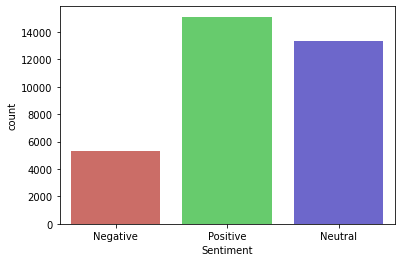

In [25]:
dfclean['Sentiment'].value_counts()
sns.countplot(x = 'Sentiment',data=dfclean,palette = 'hls')
plt.show()

In [26]:
targets = []

for i in dfclean["Sentiment"]:
    if i == "Positive":
        targets.append(1)
    elif (i == "Irrelevant") or (i == "Neutral"):
        targets.append(0)
    else:
        targets.append(-1)
dfclean["Target"] = targets

dfclean

/var/folders/zy/ptqs7vjs2lg57476q57y82g80000gn/T/ipykernel_4181/17335835.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclean["Target"] = targets


,created_at,id,full_text,user.name,user.screen_name,user.location,user.description,user.created_at,favorite_count,retweet_count,...,user.statuses_count,place.name,place.full_name,place.country_code,place.country,place.bounding_box.coordinates,Subjectivity,Polarity,Sentiment,Target
0,Sat Apr 09 09:34:42 +0000 2022,1512725683998449664,"*rubs eyes*\n\nWell, it's finally here.\n\nWe ...",Hamza Jahanzeb,hamzajahanzeb,Lancashire/Westminster,💥 Sensitivity Reader\n🎭 Publishing & Theatre B...,Sun Aug 12 11:17:38 +0000 2012,0,0,...,40646,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371...",0.633333,-0.066667,Negative,-1
1,Sat Apr 09 09:31:06 +0000 2022,1512724774866235396,"See our latest London, England Retail job oppo...",TMJ- LON Retail Jobs,tmj_lon_retail,London,Follow this account for geo-targeted Retail jo...,Fri Apr 03 13:19:31 +0000 2009,0,0,...,923,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371...",0.900000,0.500000,Positive,1
2,Sat Apr 09 09:21:27 +0000 2022,1512722347027046406,Gardening in the sun gardening,Rob 🇬🇧 🪴 🇺🇦,robjdphotos,"London, England","Mainly photos from travels, architecture, plan...",Wed Apr 01 18:33:12 +0000 2015,0,0,...,8434,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371...",0.000000,0.000000,Neutral,0
3,Sat Apr 09 09:20:31 +0000 2022,1512722111739142144,Weekend ready and hoping for sunshine like thi...,Bateaux London,BateauxLondon,"London, England",⚓️ Majestic dinner and lunch cruises 🍽 Live mu...,Wed Mar 18 08:33:06 +0000 2009,1,0,...,2972,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371...",0.500000,0.200000,Positive,1
4,Sat Apr 09 09:17:26 +0000 2022,1512721338720477194,Sounds like you’re gonna get mugged.,Adam Panzer,apanzerj,"San Francisco, CA",Infra Duder @ Second Act | (he/him) | Former: ...,Wed Sep 01 21:01:06 +0000 2010,0,0,...,3370,London,"London, England",GB,United Kingdom,"[[[-0.187894, 51.483718], [-0.109978, 51.48371...",0.000000,0.000000,Neutral,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5409,Fri Apr 01 09:30:02 +0000 2022,1509825404454027271,Our cadets had a great time taking on the Ninj...,1223Squadron,1223Squadron,"Morgan Jones Park, Caerphilly",Air Cadets Squadron based in Caerphilly,Tue Oct 15 09:04:42 +0000 2013,7,0,...,311,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473...",0.750000,0.800000,Positive,1
5410,Fri Apr 01 09:28:24 +0000 2022,1509824993013776415,i would advocate for this,Josh,grungecowboi,"Cardiff, Wales",21. He/Him. ur mum's fave emo,Mon Nov 20 12:34:51 +0000 2017,2,0,...,14002,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473...",0.000000,0.000000,Neutral,0
5411,Fri Apr 01 09:27:08 +0000 2022,1509824677430149126,_slee _1979 was my old director of fun if you ...,Jonathan Conway 🇺🇦,JonathanConway9,Cardiff,Sci-fi/Fantasy geek. Work in Social Housing in...,Sun Nov 04 18:00:50 +0000 2012,2,0,...,17866,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473...",0.356000,0.402000,Positive,1
5412,Fri Apr 01 09:26:15 +0000 2022,1509824455056539649,_slee Love it!,Jonathan Conway 🇺🇦,JonathanConway9,Cardiff,Sci-fi/Fantasy geek. Work in Social Housing in...,Sun Nov 04 18:00:50 +0000 2012,1,0,...,17866,Cardiff,"Cardiff, Wales",GB,United Kingdom,"[[[-3.278624, 51.447362], [-3.0809756, 51.4473...",0.600000,0.625000,Positive,1


In [27]:
new = [ 'full_text',
       'Subjectivity',
       'Polarity',
       'Sentiment'
           ] 

dfnew = dfclean[new]
# display(dfclean.head())
dfnew.head()

,full_text,Subjectivity,Polarity,Sentiment
0,"*rubs eyes*\n\nWell, it's finally here.\n\nWe ...",0.633333,-0.066667,Negative
1,"See our latest London, England Retail job oppo...",0.900000,0.500000,Positive
2,Gardening in the sun gardening,0.000000,0.000000,Neutral
3,Weekend ready and hoping for sunshine like thi...,0.500000,0.200000,Positive
4,Sounds like you’re gonna get mugged.,0.000000,0.000000,Neutral


In [28]:
keep = [ 'full_text',
'Target'
           ] 

dfsent = dfclean[keep]
# display(dfclean.head())
dfsent.head()

,full_text,Target
0,"*rubs eyes*\n\nWell, it's finally here.\n\nWe ...",-1
1,"See our latest London, England Retail job oppo...",1
2,Gardening in the sun gardening,0
3,Weekend ready and hoping for sunshine like thi...,1
4,Sounds like you’re gonna get mugged.,0


Convert Text to Lower Case

In [29]:
dfsent['full_text'] = dfsent['full_text'].str.lower()
dfsent

/var/folders/zy/ptqs7vjs2lg57476q57y82g80000gn/T/ipykernel_4181/669751633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsent['full_text'] = dfsent['full_text'].str.lower()


,full_text,Target
0,"*rubs eyes*\n\nwell, it's finally here.\n\nwe ...",-1
1,"see our latest london, england retail job oppo...",1
2,gardening in the sun gardening,0
3,weekend ready and hoping for sunshine like thi...,1
4,sounds like you’re gonna get mugged.,0
...,...,...
5409,our cadets had a great time taking on the ninj...,1
5410,i would advocate for this,0
5411,_slee _1979 was my old director of fun if you ...,1
5412,_slee love it!,1


Remove Punctuation

In [30]:
dfsent['full_text'] = dfsent['full_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
dfsent

/var/folders/zy/ptqs7vjs2lg57476q57y82g80000gn/T/ipykernel_4181/1115718385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsent['full_text'] = dfsent['full_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))


,full_text,Target
0,rubs eyes\n\nwell its finally here\n\nwe made ...,-1
1,see our latest london england retail job oppor...,1
2,gardening in the sun gardening,0
3,weekend ready and hoping for sunshine like thi...,1
4,sounds like you’re gonna get mugged,0
...,...,...
5409,our cadets had a great time taking on the ninj...,1
5410,i would advocate for this,0
5411,slee 1979 was my old director of fun if you ne...,1
5412,slee love it,1


Remove Extra Space

In [31]:
# dfclean["full_text"] = dfclean["full_text"].apply(lambda text: re.sub(' +', ' ', text))
# dfclean

Tokenisation

In [32]:
dfsent['full_text'] = dfsent.apply(lambda row: nltk.word_tokenize(row['full_text']), axis=1)
dfsent

/var/folders/zy/ptqs7vjs2lg57476q57y82g80000gn/T/ipykernel_4181/355944861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsent['full_text'] = dfsent.apply(lambda row: nltk.word_tokenize(row['full_text']), axis=1)


,full_text,Target
0,"[rubs, eyes, well, its, finally, here, we, mad...",-1
1,"[see, our, latest, london, england, retail, jo...",1
2,"[gardening, in, the, sun, gardening]",0
3,"[weekend, ready, and, hoping, for, sunshine, l...",1
4,"[sounds, like, you, ’, re, gon, na, get, mugged]",0
...,...,...
5409,"[our, cadets, had, a, great, time, taking, on,...",1
5410,"[i, would, advocate, for, this]",0
5411,"[slee, 1979, was, my, old, director, of, fun, ...",1
5412,"[slee, love, it]",1


Stemming

In [33]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

dfsent['stemmed'] = dfsent['full_text'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
dfsent = dfsent.drop(columns=['full_text']) # Get rid of the unstemmed column.
dfsent # Print dataframe.

# https://stackoverflow.com/questions/37443138/python-stemming-with-pandas-dataframe

/var/folders/zy/ptqs7vjs2lg57476q57y82g80000gn/T/ipykernel_4181/1454119269.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsent['stemmed'] = dfsent['full_text'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.


,Target,stemmed
0,-1,"[rub, eye, well, it, final, here, we, made, it..."
1,1,"[see, our, latest, london, england, retail, jo..."
2,0,"[garden, in, the, sun, garden]"
3,1,"[weekend, readi, and, hope, for, sunshin, like..."
4,0,"[sound, like, you, ’, re, gon, na, get, mug]"
...,...,...
5409,1,"[our, cadet, had, a, great, time, take, on, th..."
5410,0,"[i, would, advoc, for, this]"
5411,1,"[slee, 1979, was, my, old, director, of, fun, ..."
5412,1,"[slee, love, it]"


Lemmantisation

In [34]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

dfsent['stemmed'].apply(lemmatize_text)
dfsent

,Target,stemmed
0,-1,"[rub, eye, well, it, final, here, we, made, it..."
1,1,"[see, our, latest, london, england, retail, jo..."
2,0,"[garden, in, the, sun, garden]"
3,1,"[weekend, readi, and, hope, for, sunshin, like..."
4,0,"[sound, like, you, ’, re, gon, na, get, mug]"
...,...,...
5409,1,"[our, cadet, had, a, great, time, take, on, th..."
5410,0,"[i, would, advoc, for, this]"
5411,1,"[slee, 1979, was, my, old, director, of, fun, ..."
5412,1,"[slee, love, it]"


StopWords

In [35]:
stop = stopwords.words('english')

In [36]:
 dfsent['stop'] = dfsent['stemmed'].apply(lambda x: [item for item in x if item not in stop])
 dfsent = dfsent.drop(columns=['stemmed']) # Get rid of the unstemmed column.
 dfsent

,Target,stop
0,-1,"[rub, eye, well, final, made, joe, postlbf22, ..."
1,1,"[see, latest, london, england, retail, job, op..."
2,0,"[garden, sun, garden]"
3,1,"[weekend, readi, hope, sunshin, like, london, ..."
4,0,"[sound, like, ’, gon, na, get, mug]"
...,...,...
5409,1,"[cadet, great, time, take, ninja, warrior, cou..."
5410,0,"[would, advoc]"
5411,1,"[slee, 1979, old, director, fun, need, network..."
5412,1,"[slee, love]"


Bag of Words

In [37]:
count = CountVectorizer(ngram_range=(1,2), stop_words='english')
docs = dfsent['stop'].to_numpy()

lower_sentences = [' '.join(words) for words in docs]

In [38]:
bag = count.fit_transform(lower_sentences)
# print(count.vocabulary_)		#this returns a directory

In [39]:
tfidf = TfidfTransformer()
np.set_printoptions(precision=2)
print(tfidf.fit_transform(count.fit_transform(lower_sentences)).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Naive Bayes

In [40]:
X = tfidf.fit_transform(count.fit_transform(lower_sentences)).toarray()
y = dfsent["Target"].values

In [41]:
# x_train, x_test, y_train, y_test = train_test_split(text_counts,data['sentiment'],test_size=0.3)
x_train, x_test, y_train, y_test = train_test_split(X,dfsent['Target'],test_size=0.3)

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
# BernoulliNB()
clf.fit(x_train,y_train)
# clf.fit(x_train,y_train)
pred = clf.predict(x_test)
metrics.accuracy_score(y_test, pred)

Error: Kernel is dead

In [ ]:
print("Precision Score : ",precision_score(y_test, pred, pos_label='positive', average='weighted'))
print("Recall Score : ",recall_score(y_test, pred, pos_label='positive', average='weighted'))
print("f1 Score: ",f1_score(y_test, pred, pos_label='positive', average='weighted'))
print("Accuracy Score : ",accuracy_score(y_test, pred))

Error: Kernel is dead

SVM

In [ ]:
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
metrics.accuracy_score(y_test, pred)

0.8491553887187593

In [ ]:
print("Precision Score : ",precision_score(y_test, pred, pos_label='positive', average='weighted'))
print("Recall Score : ",recall_score(y_test, pred, pos_label='positive', average='weighted'))
print("f1 Score: ",f1_score(y_test, pred, pos_label='positive', average='weighted'))
print("Accuracy Score : ",accuracy_score(y_test, pred))

Precision Score :  0.8488432712799723
Recall Score :  0.8491553887187593
f1 Score:  0.8455798399464934
Accuracy Score :  0.8491553887187593


/Users/edah/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1360: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/edah/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1360: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/edah/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1360: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
cv = CountVectorizer(analyzer = 'word',ngram_range=(1,2), stop_words='english')

In [ ]:
X = cv.fit_transform(lower_sentences).toarray()
y = dfsent["Target"].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,dfsent['Target'],test_size=0.3)

In [ ]:
Blf = GaussianNB()
# BernoulliNB()
# clf.fit(x_train,y_train)
Blf.fit(x_train,y_train)
pred = Blf.predict(x_test)
metrics.accuracy_score(y_test, pred)

Error: Kernel is dead

In [ ]:
print("Precision Score : ",precision_score(y_test, pred, pos_label='positive', average='weighted'))
print("Recall Score : ",recall_score(y_test, pred, pos_label='positive', average='weighted'))
print("f1 Score: ",f1_score(y_test, pred, pos_label='positive', average='weighted'))
print("Accuracy Score : ",accuracy_score(y_test, pred))

Precision Score :  0.7909226521241319
Recall Score :  0.7952687639336141
f1 Score:  0.785828405238826
Accuracy Score :  0.7952687639336141


/Users/edah/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1360: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/edah/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1360: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/edah/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1360: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
# train model with different n-gram ranges
for N in range(1,11):
    
    # convert training data to bag of words
    X = tfidf.fit_transform(count.fit_transform(lower_sentences)).toarray()
    y = dfsent["Target"].values

    x_train, x_test, y_train, y_test = train_test_split(X,dfsent['Target'],test_size=0.3)
    
    # train model and generate predictions
    clf = MultinomialNB()
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    
    # compute f-1 score
    score = np.round(f1_score(y_test, y_pred, average='micro'),4)
    print('F-1 score of model with n-gram range of {}: {}'.format((1,N), score))

F-1 score of model with n-gram range of (1, 1): 0.7217
F-1 score of model with n-gram range of (1, 2): 0.7301
F-1 score of model with n-gram range of (1, 3): 0.7289


In [ ]:
best_model = pipeline.fit(df_model.drop('airline_sentiment', axis=1), df_model.airline_sentiment)
# Applying on new positive tweets
new_positive_tweets = pd.Series(["Thank you @VirginAmerica for you amazing customer support team on Tuesday 11/28 at @EWRairport and returning my lost bag in less than 24h! #efficiencyiskey #virginamerica"
,"Love flying with you guys ask these years. Sad that this will be the last trip 😂 @VirginAmerica #LuxuryTravel"
,"Wow @VirginAmerica main cabin select is the way to fly!! This plane is nice and clean & I have tons of legroom! Wahoo! NYC bound! ✈️"])
df_counts_pos = tc.transform(new_positive_tweets)
df_clean_pos = ct.transform(new_positive_tweets)
df_model_pos = df_counts_pos
df_model_pos['clean_text'] = df_clean_pos
best_model.predict(df_model_pos).tolist()
# Applying on new negative tweets
new_negative_tweets = pd.Series(["@VirginAmerica shocked my initially with the service, but then went on to shock me further with no response to what my complaint was. #unacceptable @Delta @richardbranson"
,"@VirginAmerica this morning I was forced to repack a suitcase w a medical device because it was barely overweight - wasn't even given an option to pay extra. My spouses suitcase then burst at the seam with the added device and had to be taped shut. Awful experience so far!"
,"Board airplane home. Computer issue. Get off plane, traverse airport to gate on opp side. Get on new plane hour later. Plane too heavy. 8 volunteers get off plane. Ohhh the adventure of travel ✈️ @VirginAmerica"])
df_counts_neg = tc.transform(new_negative_tweets)
df_clean_neg = ct.transform(new_negative_tweets)
df_model_neg = df_counts_neg
df_model_neg['clean_text'] = df_clean_neg
best_model.predict(df_model_neg).tolist()

In [ ]:
from nltk import word_tokenize, pos_tag, pos_tag_sents
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# dfclean['POSTags'] = pos_tag_sents(dfclean['stemmed'].apply(str).apply(word_tokenize).tolist())

In [ ]:
dfclean['POSTags'].to_csv('t.csv')

In [ ]:
dfclean['POSTags'].head()

0    [([, JJ), ('togeth, NNP), (', POS), (,, ,), ('...
1    [([, RB), ('big, NNP), (', POS), (,, ,), ('new...
2    [([, JJ), ('feel, NNP), (', POS), (,, ,), ('li...
3    [([, JJ), ('oh, NNP), (', POS), (,, ,), ('i, N...
4    [([, JJ), ('whi, NNP), (', POS), (,, ,), ('is,...
Name: POSTags, dtype: object